In [2]:
import pyabf
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit as cf
import os
import scipy.signal as sig
from matplotlib.widgets import Slider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
#---------- Dopasowywana funkcja ----------#  
def kochambiofizyke(x, a, b, c):
    return a*x**2 + b*x + c

#---------- Wybieranie tylko plików z rozszerzeniem .abf ----------#  
files = np.sort(os.listdir('ZAPISY'))
files_names = [n for n in files if '.abf' in n]


#---------- zapisywanie danych z plików do tablic ----------#  
xs = []
ys = []
for i in files_names:
    abf = pyabf.ABF(f'ZAPISY/{i}')
    abf.setSweep(0)
    xs.append(abf.sweepX)
    ys.append(abf.sweepY)

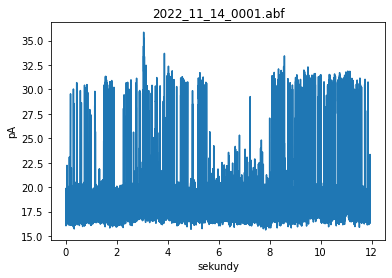

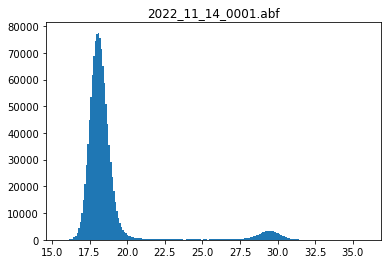

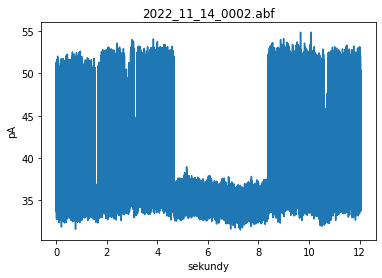

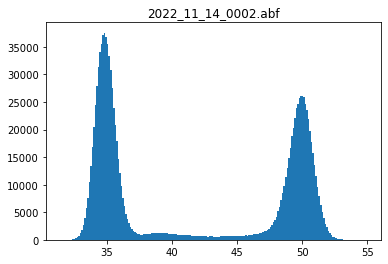

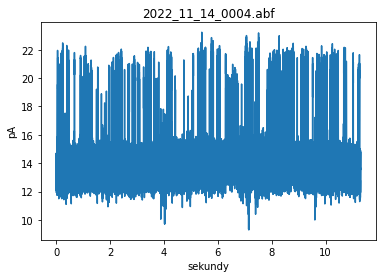

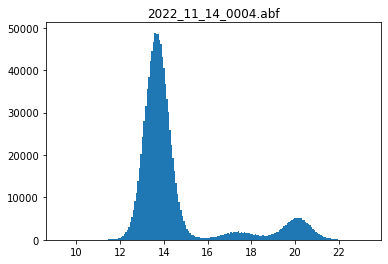

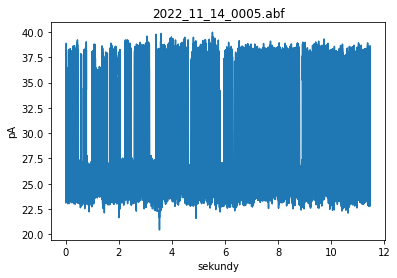

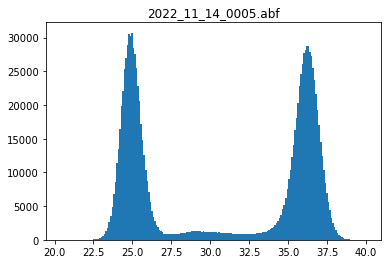

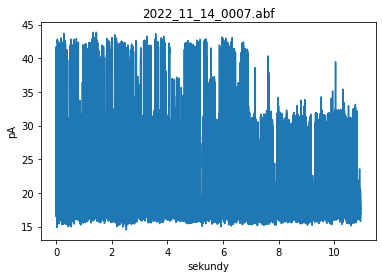

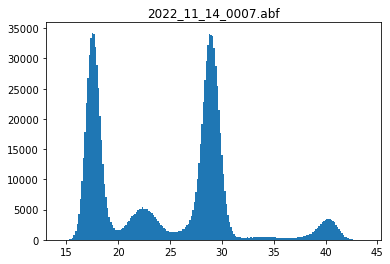

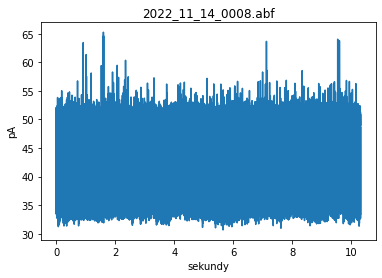

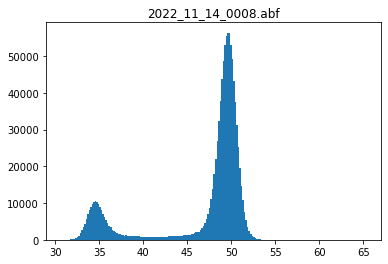

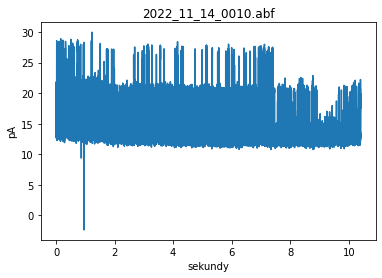

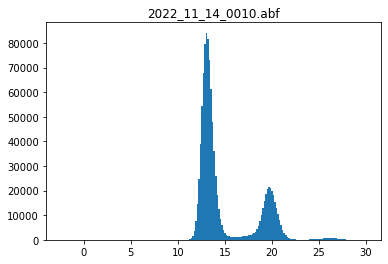

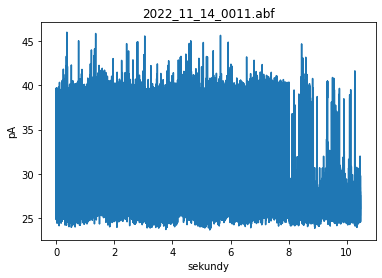

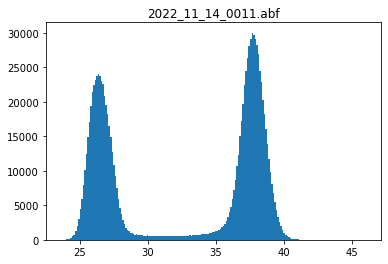

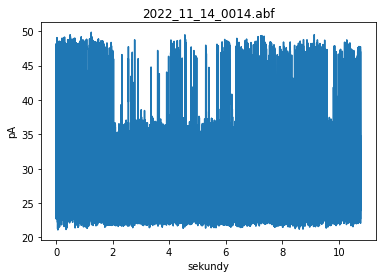

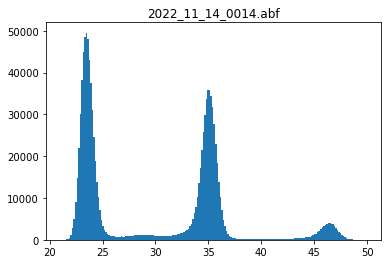

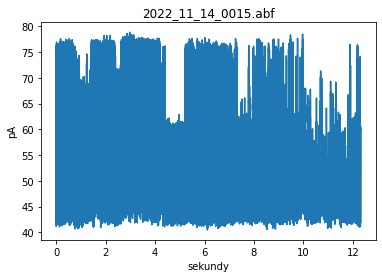

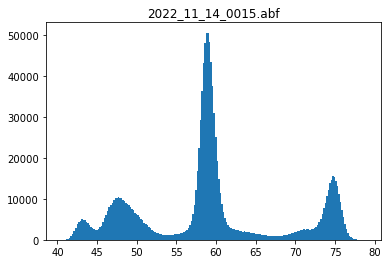

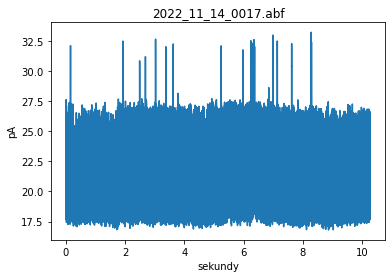

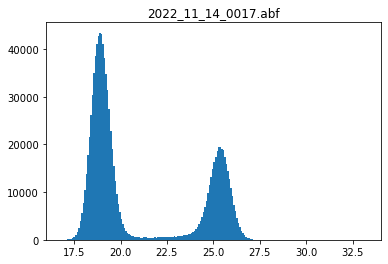

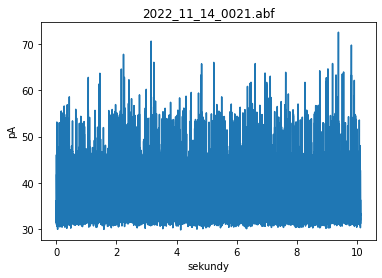

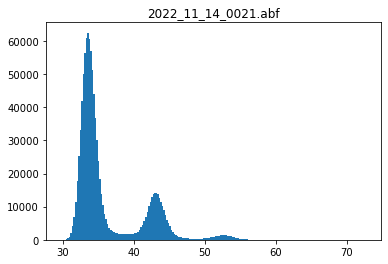

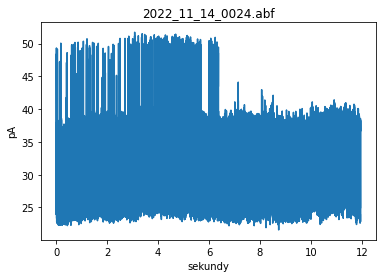

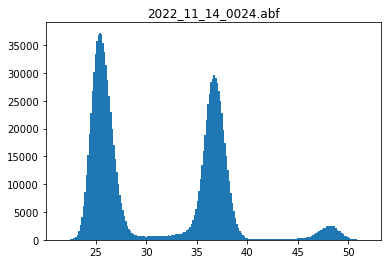

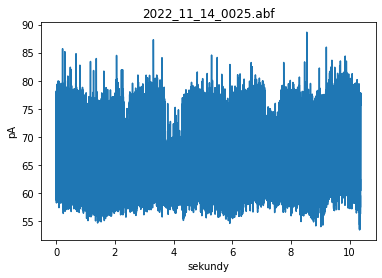

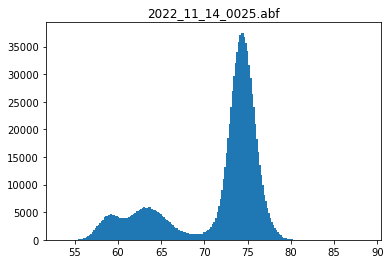

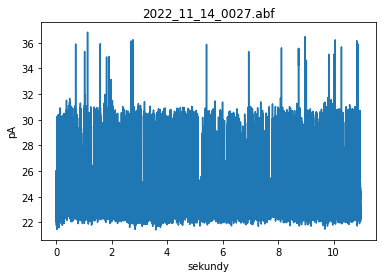

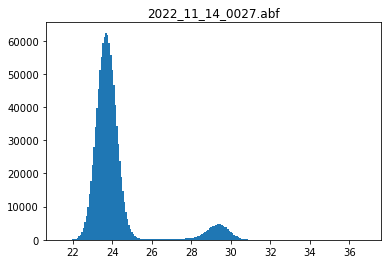

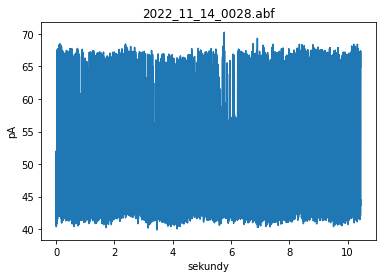

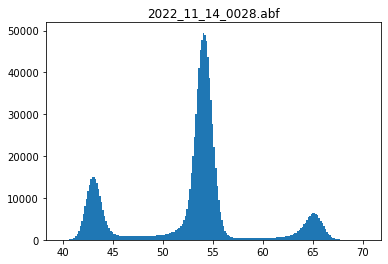

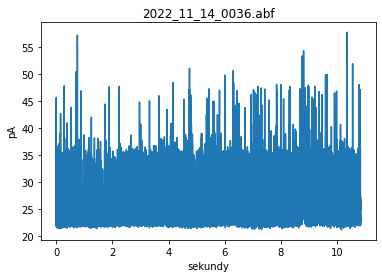

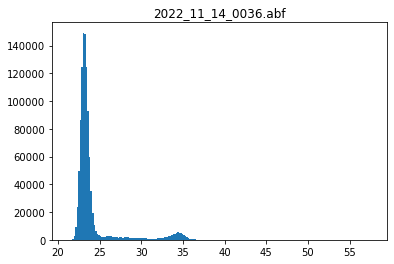

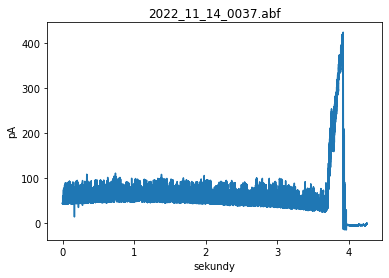

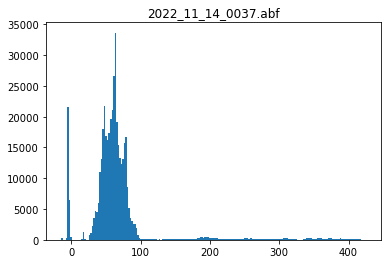

In [4]:
ys1 = []
bins = []
counts = []
for i in range(len(files_names)):
    x = xs[i]
    y = ys[i]

    mins = [np.min(k) for k in np.split(y, 100)]
    xx = np.linspace(0, np.max(x), 100)
    z = cf(kochambiofizyke, xx, mins)[0]

    y1 = y - kochambiofizyke(x, *z) + z[2]
    ys1.append(y1)

    plt.plot(x/10, y1)
    # plt.plot(x, y)
    # plt.plot(x, kochambiofizyke(x, *z))
    # #plt.plot(xx, mins)
    plt.xlabel("sekundy")
    plt.ylabel("pA")
    plt.title(files[i])
    plt.show()

    c, b, _ = plt.hist(y1, bins = 200)
    bins.append(b)
    counts.append(c)
    plt.title(files[i])
    plt.show()

In [5]:
sett = 3 # wybor pliku
def plot1(zakres):
    plt.figure(figsize=(20, 10))
    plt.plot(xs[sett], ys1[sett])
    plt.xlim(zakres, zakres+1)

interact(plot1, zakres = widgets.FloatSlider(value=70,
                                               min=0,
                                               max=xs[sett][-1]-1,
                                               step=0.1) )


interactive(children=(FloatSlider(value=70.0, description='zakres', max=113.6499), Output()), _dom_classes=('w…

<function __main__.plot1(zakres)>

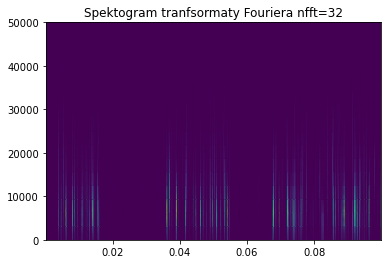

In [6]:
n = 16 # do npersega i nfft

f_spect, t_spect, Sxx = sig.spectrogram(ys[3][700000:710000], fs = 100000, window='hamming', nperseg = n , nfft = 2*n)
plt.pcolormesh(t_spect, f_spect, Sxx, shading='gouraud')
plt.title("Spektogram tranfsormaty Fouriera nfft=32")
plt.show()

In [7]:
#---------- Repeat period ----------#  
level = 32 # poziom 30 przykładowo dla sett 3
sett = 3
points = []
for i in range(len(xs[sett])-1):
    if ys[sett][i] > level and ys[sett][i+1] < level:
        points.append(xs[sett][i+1]) 


#---------- Burst ----------#
points_diff = np.diff(points)
pd_mean = 2*np.mean(points_diff)
burst_bound = [0]
burst = [points[0]]

for i in range(1, len(points_diff)-1):
    if points_diff[i+1] < pd_mean and points_diff[i-1] < pd_mean:    
        if points_diff[i] > 0.1:
            burst_bound.append(i)
            burst_bound.append(i+1)
            burst.append(points[i])
            burst.append(points[i+1])
burst_bound.append(len(points)-1)
burst.append(points[-1])
len(burst_bound)

152

In [8]:


def plot2(zakres2):
    plt.figure(figsize=(20, 10))
    plt.xlim(zakres2, zakres2+1)
    plt.plot(points, np.full(len(points),level),'.')
    plt.plot(burst, np.full(len(burst),level),c = 'r', marker = 'o', linestyle='')

interact(plot2, zakres2 = widgets.FloatSlider(value=0,
                                               min=0,
                                               max=xs[sett][-1]-1,
                                               step=0.1) )



interactive(children=(FloatSlider(value=0.0, description='zakres2', max=113.6499), Output()), _dom_classes=('w…

<function __main__.plot2(zakres2)>

In [9]:
points_diff = np.diff(points)
pd_mean = 2*np.mean(points_diff)
burst_bound = [0]
burst = [points[0]]

for i in range(1, len(points_diff)-1):
    if points_diff[i+1] < pd_mean and points_diff[i-1] < pd_mean:    
        if points_diff[i] > 0.1:
            burst_bound.append(i)
            burst_bound.append(i+1)
            burst.append(points[i])
            burst.append(points[i+1])
burst_bound.append(len(points)-1)
burst.append(points[-1])
len(burst_bound)


152

(0.0, 0.1)

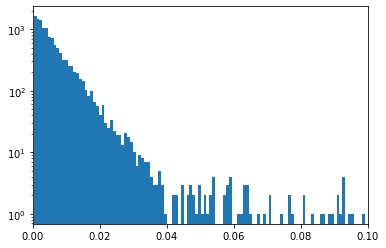

In [10]:
counts1, bins1, _ = plt.hist(points_diff, bins = 3000,log=True)
plt.xlim(0, right=0.1)

C:\Users\almek\AppData\Local\Temp/ipykernel_16480/2247511982.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(bins1[:-1],np.log(counts1))


(0.0, 0.1)

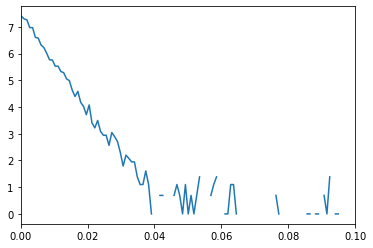

In [11]:
plt.plot(bins1[:-1],np.log(counts1))
plt.xlim(0, right=0.1)
#plt.ylim(bottom = 1)


C:\Users\almek\AppData\Local\Temp/ipykernel_16480/3424023842.py:13: RuntimeWarning: divide by zero encountered in log
  y_h = np.log(counts1[0:it])


(0.0, 0.1)

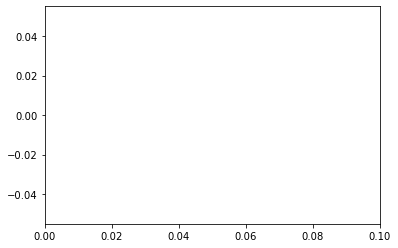

In [12]:
# x_h = bins[:-1]
# y_h = np.where(counts > 0.0000000001, counts, -10)
# a,b = np.polyfit(x_h, np.log(y_h, out=y_h, where=y_h > 0),1)
def find_iterator(y):
    b = 0
    for i in range(len(y)):
        if np.log(y[i],where = 0) :
            b = i
    return b

it = find_iterator(counts1)
x_h = bins1[:it]
y_h = np.log(counts1[0:it])
a,b = np.polyfit(x_h, y_h,1)
plt.plot(x_h, x_h*a+b)
plt.xlim(0, right=0.1)

[ 24 136]


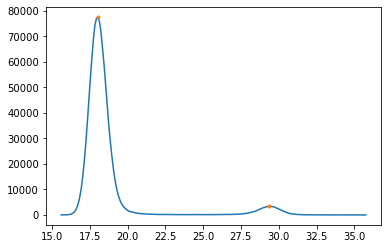

[ 28 158]


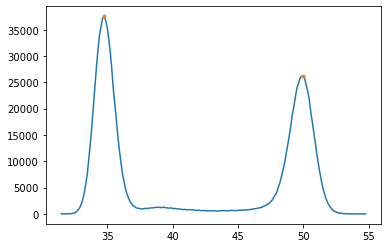

[ 61 116 155]


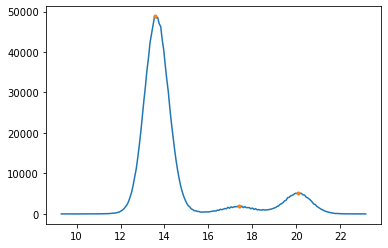

[ 46 161]


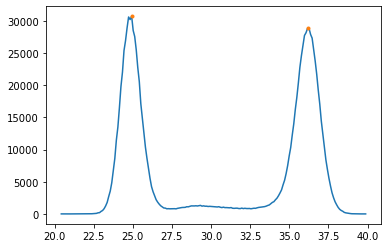

[ 20  53  97 175]


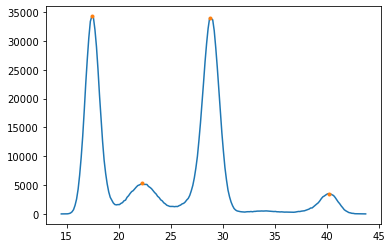

[ 22 109]


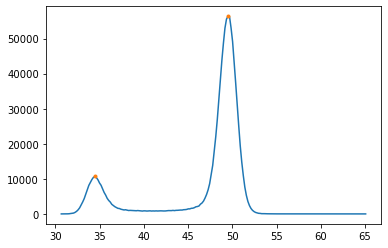

[ 95 136]


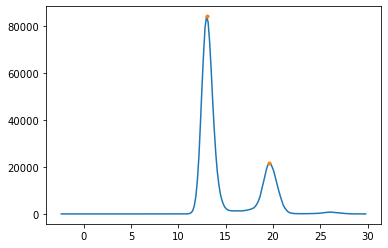

[ 24 125]


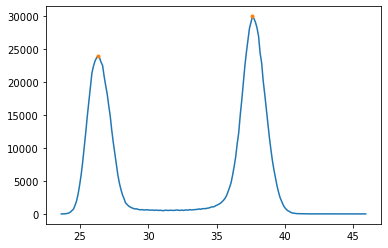

[ 16  97 176]


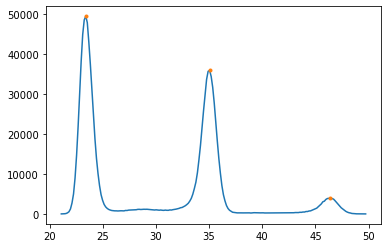

[ 13  37  96 178]


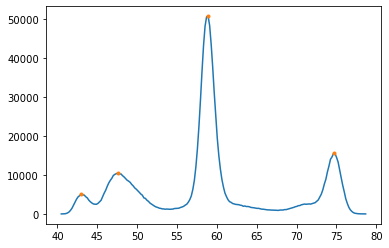

[ 25 104]


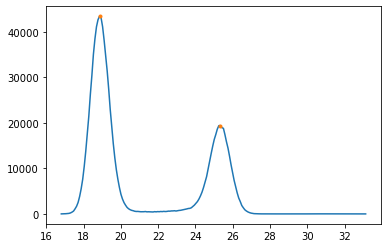

[17 62]


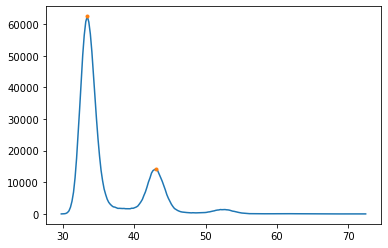

[ 25 100 175]


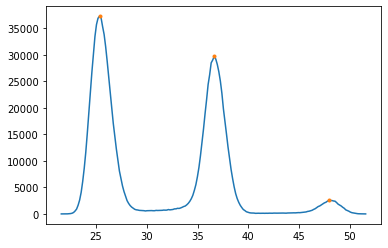

[ 32  57 118]


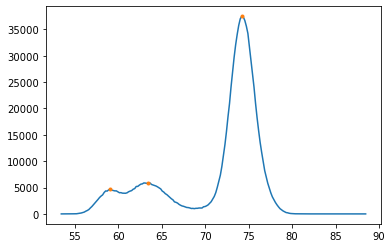

[ 29 102]


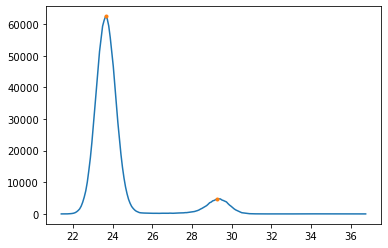

[ 21  93 165]


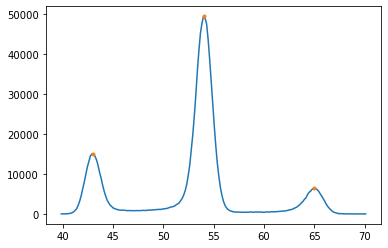

[10 72]


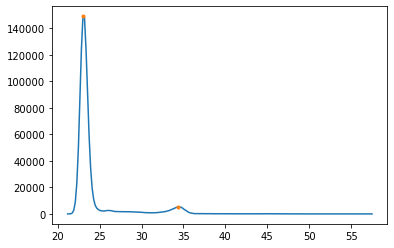

In [13]:
peaks = []
for i in range(len(counts)-1):
    k ,_,= sig.find_peaks(counts[i],height=2000, width=4)
    peaks.append(k)
    print(k)
    plt.plot(bins[i][:-1],counts[i])
    plt.plot(bins[i][k], counts[i][k], '.')
    plt.show()


In [80]:
points2 = []
for i,x in enumerate(peaks):
    points2.append([])
    level = []
    for j in range(len(np.array(peaks[i]))-1): 
        level.append((bins[i][peaks[i][j]]+bins[i][peaks[i][j+1]])/2)
    print(len(level))
    for k in range(len(level)):
        print('siema')
        points2[k].append([])
        for z in range(len(ys[i])-1):
            if ys[i][z] > level[k] and ys[i][z+1] < level[k]:
                points2[i][k].append(xs[i][z+1])       
    print(f'{i+1}/{len(peaks)}')
    

1
siema
1/17
1
siema


IndexError: list index out of range

In [79]:
# points_diff = np.diff(points)
# pd_mean = 2*np.mean(points_diff)
# burst_bound = [0]
# burst = [points[0]]

# for i in range(1, len(points_diff)-1):
#     if points_diff[i+1] < pd_mean and points_diff[i-1] < pd_mean:    
#         if points_diff[i] > 0.1:
#             burst_bound.append(i)
#             burst_bound.append(i+1)
#             burst.append(points[i])
#             burst.append(points[i+1])
# burst_bound.append(len(points)-1)
# burst.append(points[-1])
# len(burst_bound)


0
